In [127]:
import requests
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
gold_url = "https://www.quandl.com/api/v3/datasets/LBMA/GOLD.json?api_key=1VFs5aGzkiaDresBUGY4"
def api_call(link):
    url = link
    response = requests.get(url)
    
    data = response.text
    data_dict=json.loads(data)
    return data_dict
    
gold_raw_data = api_call(gold_url)


1

In [53]:
gold_raw_data

{'dataset': {'id': 11304240,
  'dataset_code': 'GOLD',
  'database_code': 'LBMA',
  'name': 'Gold Price: London Fixing',
  'description': "Gold Price: London Fixings, London Bullion Market Association (LBMA). Fixing levels are set per troy ounce.\nThe London Gold Fixing Companies set the prices for gold that are globally considered as the international standard for pricing of gold.\nThe Gold price in London is set twice a day by five LBMA Market Makers who comprise the London Gold Market Fixing Limited (LGMFL).\nThe process starts with the announcement from the Chairman of the LGMFL to the other members of the LBMA Market Makers, then relayed to the dealing rooms where customers can express their interest as buyers or sellers and also the quantity they wish to trade. The gold fixing price is then set by collating bids and offers until the supply and demand are matched. At this point the price is announced as the 'Fixed' price for gold and all business is conducted on the basis of that 

In [73]:
gold_daily = gold_raw_data['dataset']['data']


In [82]:
gold_daily[0][2]

1553.6

In [117]:
def parse_gold(data):
    new_gold_daily = []
    for x in gold_daily:
        date = x[0]
        price = x[2]
        data_tuple=(date,price)
        new_gold_daily.append(data_tuple)
    return new_gold_daily

In [89]:
gold_df = pd.DataFrame(new_gold_daily)

In [92]:
gold_df = gold_df.rename(columns = {0 : 'date', 1: 'value'})

In [63]:
date_close = []
for items in gold_daily:
    date_close.append(items[0])

In [64]:
date_close

['2020-01-10',
 '2020-01-09',
 '2020-01-08',
 '2020-01-07',
 '2020-01-06',
 '2020-01-03',
 '2020-01-02',
 '2019-12-31',
 '2019-12-30',
 '2019-12-27',
 '2019-12-24',
 '2019-12-23',
 '2019-12-20',
 '2019-12-19',
 '2019-12-18',
 '2019-12-17',
 '2019-12-16',
 '2019-12-13',
 '2019-12-12',
 '2019-12-11',
 '2019-12-10',
 '2019-12-09',
 '2019-12-06',
 '2019-12-05',
 '2019-12-04',
 '2019-12-03',
 '2019-12-02',
 '2019-11-29',
 '2019-11-28',
 '2019-11-27',
 '2019-11-26',
 '2019-11-25',
 '2019-11-22',
 '2019-11-21',
 '2019-11-20',
 '2019-11-19',
 '2019-11-18',
 '2019-11-15',
 '2019-11-14',
 '2019-11-13',
 '2019-11-12',
 '2019-11-11',
 '2019-11-08',
 '2019-11-07',
 '2019-11-06',
 '2019-11-05',
 '2019-11-04',
 '2019-11-01',
 '2019-10-31',
 '2019-10-30',
 '2019-10-29',
 '2019-10-28',
 '2019-10-25',
 '2019-10-24',
 '2019-10-23',
 '2019-10-22',
 '2019-10-21',
 '2019-10-18',
 '2019-10-17',
 '2019-10-16',
 '2019-10-15',
 '2019-10-14',
 '2019-10-11',
 '2019-10-10',
 '2019-10-09',
 '2019-10-08',
 '2019-10-

In [97]:
gold_df = gold_df['date']

0        2020-01-10
1        2020-01-09
2        2020-01-08
3        2020-01-07
4        2020-01-06
            ...    
13145    1968-01-08
13146    1968-01-05
13147    1968-01-04
13148    1968-01-03
13149    1968-01-02
Name: date, Length: 13150, dtype: object

In [98]:
gold_df['date']

dtype('O')

In [102]:
gold_df['date'] = pd.to_datetime(gold_df['date'])

In [103]:
gold_df['date'].dtype

dtype('<M8[ns]')

In [104]:
gold_df.sort_values('date', ascending = True)

,date,value
13149,1968-01-02,NaN
13148,1968-01-03,NaN
13147,1968-01-04,NaN
13146,1968-01-05,NaN
13145,1968-01-08,NaN
...,...,...
4,2020-01-06,1573.10
3,2020-01-07,1567.85
2,2020-01-08,1571.95
1,2020-01-09,1550.75


In [106]:
gold_df = gold_df[gold_df['date'] > '2014-12-31']

In [112]:
gold_df = gold_df[gold_df['date'] < '2019-12-31']

In [125]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 8 to 1270
Data columns (total 2 columns):
date     1263 non-null datetime64[ns]
value    1254 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.6 KB


In [126]:
gold_df.shape

(1263, 2)

In [143]:
nan_find = gold_df['value'].isna()
for item in nan_find:
    if item == True:
        print(item)

True
True
True
True
True
True
True
True
True


In [129]:
gold_df.describe()

,value
count,1254.000000
mean,1265.824601
std,98.672962
min,1049.400000
25%,1205.012500
50%,1261.825000
75%,1314.850000
max,1546.100000


In [153]:
gold_df.to_csv('gold_data.csv', sep = ',')

In [147]:
gold_df['date']

8      2019-12-30
9      2019-12-27
10     2019-12-24
11     2019-12-23
12     2019-12-20
          ...    
1266   2015-01-08
1267   2015-01-07
1268   2015-01-06
1269   2015-01-05
1270   2015-01-02
Name: date, Length: 1263, dtype: datetime64[ns]

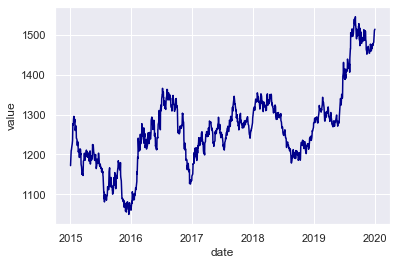

In [165]:
sns.lineplot(gold_df['date'], gold_df['value'], color = 'darkblue')
sns.set_style('darkgrid')